In [15]:
import matplotlib.pyplot as plt  
import numpy as np

BASE_PATH = "/Volumes/externo/gsgp-mo/results/"
OUTPUT_PATH = "/Volumes/externo/assets"
STRATEGIES = ['random', 'kmeans', 'kernel']
STRATEGIES_TITLES = ['Random', 'K-Means', 'Kernel K-Means']
K = range(2, 6)
#COLORS = ["#3F5D7D", "green", "orange"]
COLORS = ["#5F6CAF", "#FFB677", "#F0134D"]
STRATEGY_COLORS = ["#FE9801", "#F65C78", "#018383"]
DATASETS = ['bioavailability', 'ccn', 'ccun', 'concrete', 'energyCooling', 'energyHeating',
            'keijzer-7', 'parkinsons', 'towerData', 'vladislavleva-1', 'wineRed', 'wineWhite',
            'yacht']

def plot(dataset, benchmark, y_values, y_errors):
    f, ax = plt.subplots(1,3, sharey=True, figsize=(15,5)) 
    f.suptitle(dataset.upper(), fontsize=13)
    f.subplots_adjust(top=0.8, bottom=0.2)
    #fig.ylabel("RMSE", fontsize=12)  
    #fig.xlabel("Number of Regions", fontsize=12)
    f.text(0.5, 0.04, 'Number of Regions', va='center', ha='center', fontsize=12)
    f.text(0.04, 0.5, 'Test RMSE', va='center', ha='center', rotation='vertical', fontsize=12)
        
    for i, (y, err) in enumerate(zip(y_values, y_errors)):     
        # Remove the plot frame lines. They are unnecessary chartjunk.  
        
        ax[i].set_title(STRATEGIES_TITLES[i].upper(), {"fontsize": 12})
        ax[i].spines["top"].set_visible(False)  
        ax[i].spines["right"].set_visible(False)      
        ax[i].get_yaxis().tick_left()  
        ax[i].get_xaxis().tick_bottom()  
        # Limit the range of the plot to only where the data is.  
        # Avoid unnecessary whitespace.  
        # plt.ylim(63, 85)  

        # Make sure your axis ticks are large enough to be easily read.  
        # You don't want your viewers squinting to read your plot.  
        ax[i].set_xticks(K)  
        ax[i].set_xticklabels(K) 
        #plt.yticks(range(65, 86, 5), fontsize=14)  


            # Use matplotlib's fill_between() call to create error bars.  
            # Use the dark blue "#3F5D7D" as a nice fill color.  


            # Plot the means as a white line in between the error bars.   
            # White stands out best against the dark blue.  
            #plt.scatter(K, y, color="#3F5D7D", lw=2, marker=MARKERS[i], alpha=0.5)
        for j, (y_entry, err_entry) in enumerate(zip(y, err)):
            ax[i].plot(K, y_entry, color=COLORS[j], alpha=0.75, marker='o')  
            #ax[i].fill_between(K, y_entry - err_entry, y_entry + err_entry, color=COLORS[j], alpha=0.75)  
            
        ax[i].plot(K, benchmark, color="gray", linestyle='dashed')

    # Make the title big enough so it spans the entire plot, but don't make it  
    # so big that it requires two lines to show.  

    return f

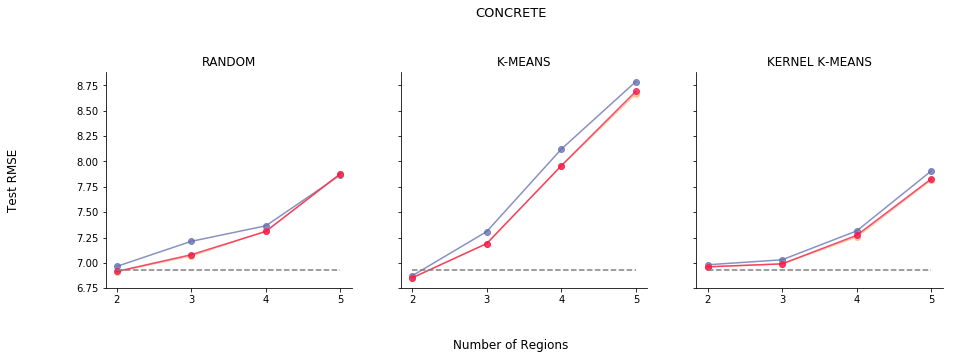

In [10]:
from scipy.stats import iqr

def plot_dataset_rmse(evol, dataset):
    benchmarks = np.loadtxt("%s/%s/%s/output-%s/tsFitness.csv" % (BASE_PATH, evol, "single", dataset), delimiter=',', unpack=True)[-1]
    benchmarks = np.repeat([np.median(benchmarks)], len(K))

    y_values = []
    y_errors = []
    for strategy in STRATEGIES:
        curr_values = [
            [],
            [],
            []
        ]
        curr_errors = [
            [],
            [],
            []
        ]

        for k in K:
            directory = "%s/%s/%s/%s/output-%s" % (BASE_PATH, evol, strategy, k, dataset)
            predicted = [
                np.loadtxt("%s/ensemble_stacking_fitness.csv" % (directory), delimiter=',', unpack=True)[-1],
                np.loadtxt("%s/ensemble_unweighted_fitness.csv" % (directory), delimiter=',', unpack=True)[-1],
                np.loadtxt("%s/ensemble_weighted_fitness.csv" % (directory), delimiter=',', unpack=True)[-1]
            ]

            for i in range(len(predicted)):
                curr_values[i].append(np.median(predicted[i]))
                curr_errors[i].append(iqr(predicted[i]))

        y_values.append(curr_values)
        y_errors.append(curr_values)

    return plot(dataset, benchmarks, np.array(y_values), np.array(y_errors))

plot_dataset_rmse("gsgp", "concrete")
plt.show()

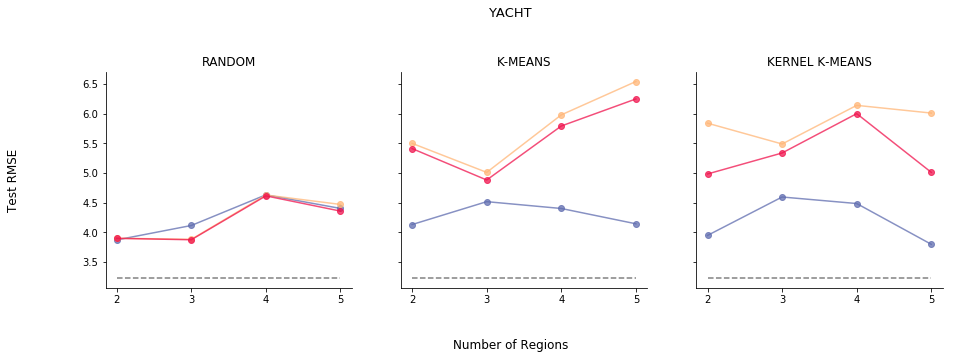

In [11]:
plot_dataset_rmse("gp", "yacht")
plt.show()

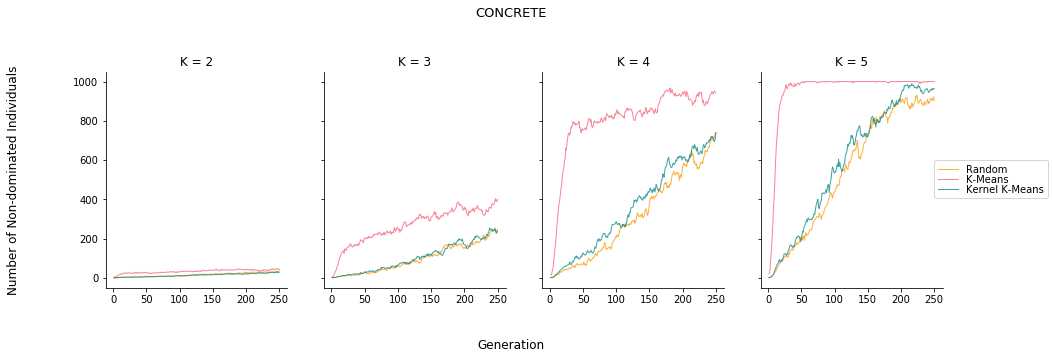

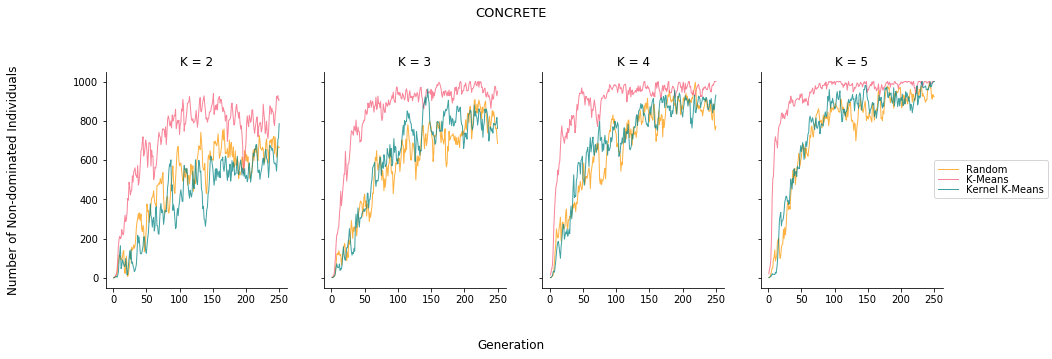

In [109]:
def load_non_dominated_over_gen(evol, dataset, strategy, k):
    non_dominated_over_gen = []
    
    with open("%s/%s/%s/%s/output-%s/fronts_tr_sizes.csv" % (BASE_PATH, evol, strategy, k, dataset)) as f:
        for line in f:
            gens = line.split(",")
            non_dominated = list(zip(*map(lambda s: np.array(s.split("#")).astype(int), gens[1:])))[0]
            non_dominated_over_gen.append(non_dominated)
    f.close()
    
    output = list(zip(*non_dominated_over_gen))
    
    return (np.mean(output, axis=1)[:-1], np.std(output, axis=1)[:-1])
    
def plot_non_dominated_over_gen(evol, dataset):
    f, ax = plt.subplots(1,4, sharey=True, sharex=True, figsize=(15,5)) 
    f.suptitle(dataset.upper(), fontsize=13)
    f.subplots_adjust(top=0.8, bottom=0.2)
    f.text(0.5, 0.04, 'Generation', va='center', ha='center', fontsize=12)
    f.text(0.04, 0.5, 'Number of Non-dominated Individuals', va='center', ha='center', rotation='vertical', fontsize=12)

    x = range(1,251)
    for i, k in enumerate(K):     
        # Remove the plot frame lines. They are unnecessary chartjunk.  
        
        ax[i].set_title("K = %s" % k, {"fontsize": 12})
        ax[i].spines["top"].set_visible(False)  
        ax[i].spines["right"].set_visible(False)      
        ax[i].get_yaxis().tick_left()  
        ax[i].get_xaxis().tick_bottom()  
        # Limit the range of the plot to only where the data is.  
        # Avoid unnecessary whitespace.  
        # plt.ylim(63, 85)  

        # Make sure your axis ticks are large enough to be easily read.  
        # You don't want your viewers squinting to read your plot.  
        #plt.yticks(range(65, 86, 5), fontsize=14)  


            # Use matplotlib's fill_between() call to create error bars.  
            # Use the dark blue "#3F5D7D" as a nice fill color.  


            # Plot the means as a white line in between the error bars.   
            # White stands out best against the dark blue.  
            #plt.scatter(K, y, color="#3F5D7D", lw=2, marker=MARKERS[i], alpha=0.5)
        for j, strategy in enumerate(STRATEGIES):
            y, err = load_non_dominated_over_gen(evol, dataset, strategy, k)
            ax[i].plot(x,y, color=STRATEGY_COLORS[j], alpha=0.75, label=STRATEGIES_TITLES[j], lw=1)  
            #ax[i].fill_between(x, y - err, y + err, color=COLORS[j], alpha=0.75)  
    h, l = ax[0].get_legend_handles_labels()
    f.legend(h, l, loc='center right', ncol=1, labelspacing=0. )        


plot_non_dominated_over_gen("gsgp", "concrete")
plot_non_dominated_over_gen("gp", "concrete")
plt.show()

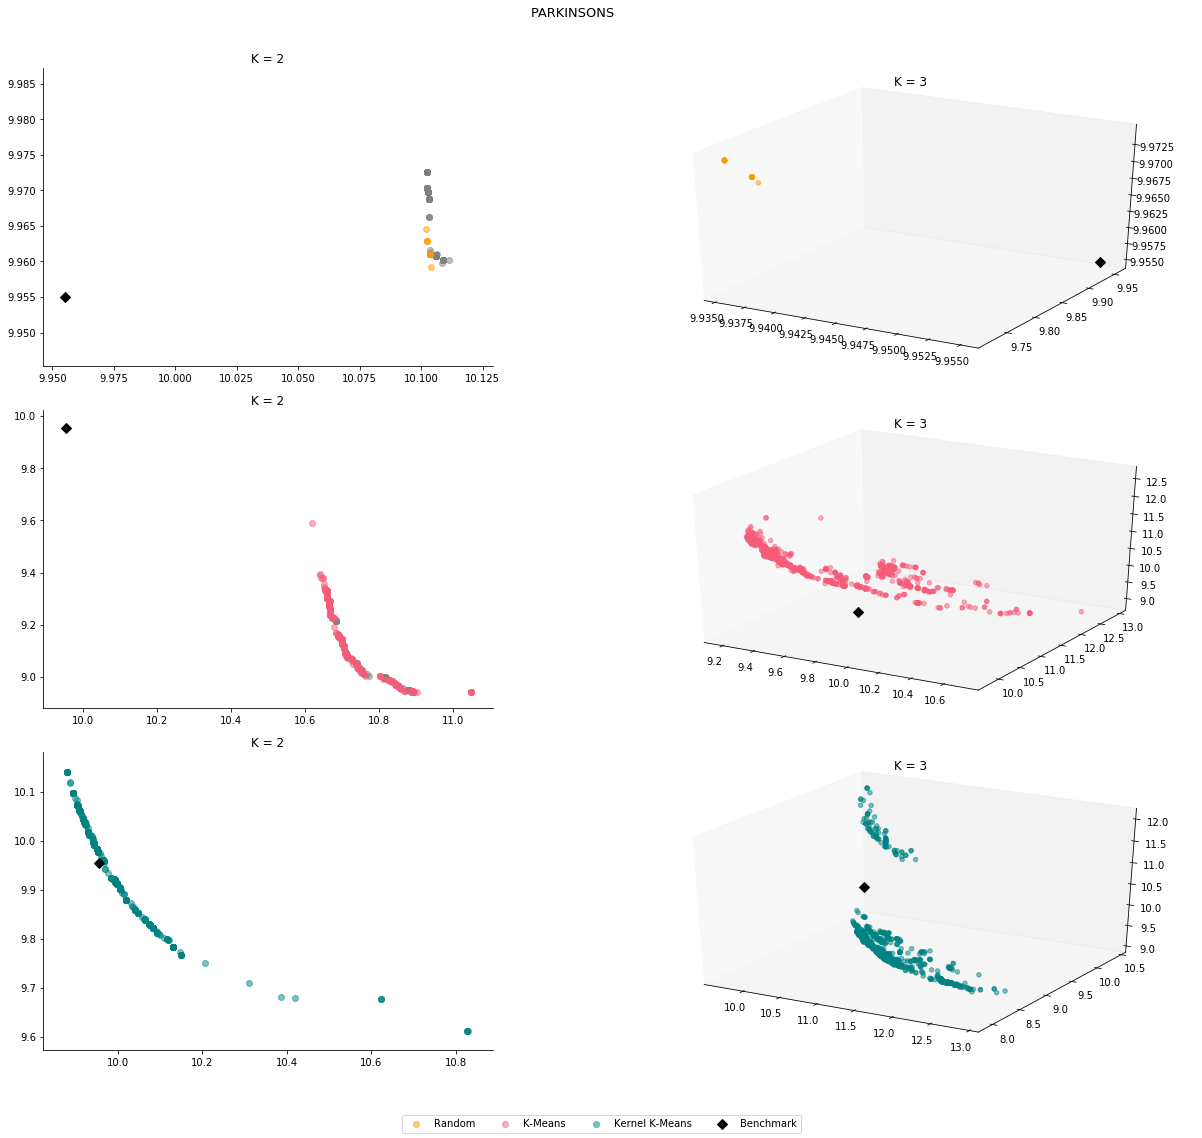

In [112]:
from mpl_toolkits.mplot3d import Axes3D

def load_fronts(evol, dataset, strategy, k):
    outputs = []
    
    with open("%s/%s/%s/%s/output-%s/fronts_tr.csv" % (BASE_PATH, evol, strategy, k, dataset)) as f:
        for line in f:
            execution, fronts = line.split(",")

            output = []
            for front in fronts.split("#"):
                individuals = []
                for individual in front.split("|"):
                    errors = list(map(float, individual.split(";")))
                    individuals.append(errors)
                
                output.append(individuals)
            outputs.append(np.array(output))

    f.close()

    return outputs
    
def plot_fronts(evol, dataset, execution = 5):
    f, ax = plt.subplots(3,2, figsize=(16,16), gridspec_kw={'width_ratios': [0.8, 1.2]})
    f.suptitle(dataset.upper(), fontsize=13)
    f.subplots_adjust(top=0.9, bottom=0.2)
    
    raw_benchmarks = np.loadtxt("%s/%s/%s/output-%s/trFitness.csv" % (BASE_PATH, evol, "single", dataset), delimiter=',', unpack=True)[-1]
    x = range(1,251)
    for row, strategy in enumerate(STRATEGIES):                
        for col, k in enumerate([2, 3]):
            benchmarks = np.repeat([np.median(raw_benchmarks)], k)    
            index = row * (2) + col + 1
            if k == 3:
                ax[row, col].remove()
                ax[row, col]=f.add_subplot(3, 2, index, projection='3d', facecolor='white')
                ax[row, col].set_title("K = %s" % k, {"fontsize": 12})
                ax[row, col].grid(False)

            ax[row, col].spines["top"].set_visible(False)  
            ax[row, col].spines["right"].set_visible(False)      
            
            if k == 2:
                ax[row, col].get_yaxis().tick_left()  
                ax[row, col].get_xaxis().tick_bottom()  
            
            fronts = load_fronts(evol, dataset, strategy, k)[execution]
            
            nondominated = list(zip(*fronts[0]))
            dominated = fronts[1:]
            individuals = []

            for front in dominated:
                for ind in front:
                    individuals.append(ind)

            individuals = list(zip(*individuals))                    
            
            if len(nondominated) == 2:
                ax[row, col].set_title("K = %s" % k, {"fontsize": 12})
                if len(individuals) > 0:
                    ax[row, col].scatter(individuals[0], individuals[1], color="gray", alpha=0.5)
                ax[row, col].scatter(nondominated[0],nondominated[1], color=STRATEGY_COLORS[row], alpha=0.5, label=STRATEGIES_TITLES[row])
                ax[row, col].scatter(benchmarks[0], benchmarks[1], color='black', marker='D', s=50, label="Benchmark")
            if len(nondominated) == 3:
                if len(individuals) > 0:
                    ax[row, col].scatter(individuals[0], individuals[1], individuals[2], color="gray", alpha=0.5)
                ax[row, col].scatter(nondominated[0],nondominated[1], nondominated[2], color=STRATEGY_COLORS[row], alpha=0.5, label=STRATEGIES_TITLES[row])
                ax[row, col].scatter(benchmarks[0], benchmarks[1], benchmarks[2], color='black', marker='D', s=50, label="Benchmark")

    h1, l1 = ax[0,0].get_legend_handles_labels()
    h2, l2 = ax[1,0].get_legend_handles_labels()
    h3, l3 = ax[2,0].get_legend_handles_labels()
    f.legend([h1[0], h2[0]] + h3, [l1[0], l2[0]] + l3, loc='lower center', ncol=5, labelspacing=0. )        
    f.tight_layout(rect=[0, 0.05, 1.05, 0.95])
                
    return f
        
plot_fronts("gp", "parkinsons")
plt.show()

In [114]:
for mode in ['gsgp']:
    for dataset in DATASETS:
        print("Generating assets for %s using %s" % (dataset, mode))
        plot_dataset_rmse(mode, dataset)
        plt.savefig("%s/rmse_%s_%s.pdf" % (OUTPUT_PATH, mode, dataset)) 
        plt.close()

        plot_non_dominated_over_gen(mode, dataset)
        plt.savefig("%s/non_dominated_%s_%s.pdf" % (OUTPUT_PATH, mode, dataset))  
        plt.close()

        plot_fronts(mode, dataset)
        plt.savefig("%s/front_sample_%s_%s.pdf" % (OUTPUT_PATH, mode, dataset))  
        plt.close()
        


Generating assets for bioavailability using gsgp
Generating assets for ccn using gsgp
Generating assets for ccun using gsgp
Generating assets for concrete using gsgp
Generating assets for energyCooling using gsgp
Generating assets for energyHeating using gsgp
Generating assets for keijzer-7 using gsgp
Generating assets for parkinsons using gsgp
Generating assets for towerData using gsgp
Generating assets for vladislavleva-1 using gsgp
Generating assets for wineRed using gsgp
Generating assets for wineWhite using gsgp
Generating assets for yacht using gsgp
